# World-Wide Influenza Model

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

# World 2015 to 2022 Cases

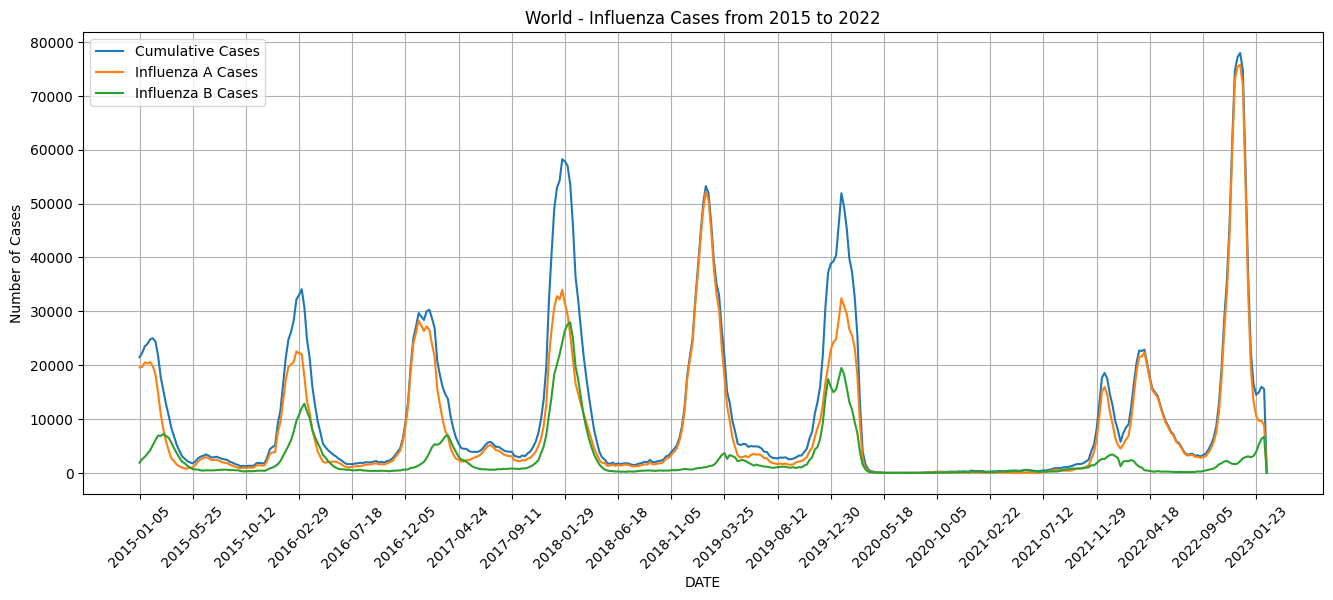

In [2]:
# Load the data from the Excel file
df_2015_to_2022 = pd.read_excel('Influenza_Model.xlsx', engine='openpyxl')

# Group the data by year and ISO_WEEK, calculate the sum (sentinel and non-sentinel) of INF_ALL for each group
df_agg = df_2015_to_2022.groupby(['ISO_YEAR', 'ISO_SDATE']).agg({'INF_ALL': 'sum', 'INF_A': 'sum', 'INF_B': 'sum'}).reset_index()

# # Extract only the date portion of ISO_SDATE column
df_agg['ISO_SDATE'] = df_agg['ISO_SDATE'].str.split('T').str[0]

# # Create a line plot using ISO_WEEK as the x-axis and INF_ALL as the y-axis
plt.figure(figsize=(16, 6))
plt.plot(df_agg['ISO_SDATE'], df_agg['INF_ALL'], label='Cumulative Cases')
plt.plot(df_agg['ISO_SDATE'], df_agg['INF_A'], label='Influenza A Cases')
plt.plot(df_agg['ISO_SDATE'], df_agg['INF_B'], label='Influenza B Cases')

plt.xlabel('DATE')
plt.ylabel('Number of Cases')
plt.title('World - Influenza Cases from 2015 to 2022')

xtick_pos = np.arange(0, len(df_agg['ISO_SDATE']), 20)
plt.xticks(xtick_pos, df_agg['ISO_SDATE'][xtick_pos], rotation=45)
plt.legend()
plt.grid()
plt.show()